# Чистка Данных

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Adidas_Another version.csv", sep=";")
data = df
df.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Unnamed: 13
0,Foot Locker,1185732.0,01.01.2020,Northeast,New York,New York,Men's Street Footwear,"$50,00",1 200,$60 000,$300 000,50%,In-store,NaN
1,Foot Locker,1185732.0,02.01.2020,Northeast,New York,New York,Men's Athletic Footwear,"$50,00",1 000,$50 000,$150 000,30%,In-store,NaN
2,Foot Locker,1185732.0,03.01.2020,Northeast,New York,New York,Women's Street Footwear,"$40,00",1 000,$40 000,$140 000,35%,In-store,NaN
3,Foot Locker,1185732.0,04.01.2020,Northeast,New York,New York,Women's Athletic Footwear,"$45,00",850,$38 250,$133 875,35%,In-store,NaN
4,Foot Locker,1185732.0,05.01.2020,Northeast,New York,New York,Men's Apparel,"$60,00",900,$54 000,$162 000,30%,In-store,NaN
5,Foot Locker,1185732.0,06.01.2020,Northeast,New York,New York,Women's Apparel,"$50,00",1 000,$50 000,$125 000,25%,In-store,NaN
6,Foot Locker,1185732.0,07.01.2020,Northeast,New York,New York,Men's Street Footwear,"$50,00",1 250,$62 500,$312 500,50%,In-store,NaN
7,Foot Locker,1185732.0,08.01.2020,Northeast,New York,New York,Men's Athletic Footwear,"$50,00",900,$45 000,$135 000,30%,Outlet,NaN
8,Foot Locker,1185732.0,21.01.2020,Northeast,New York,New York,Women's Street Footwear,"$40,00",950,$38 000,$133 000,35%,Outlet,NaN
9,Foot Locker,1185732.0,22.01.2020,Northeast,New York,New York,Women's Athletic Footwear,"$45,00",825,$37 125,$129 938,35%,Outlet,NaN


In [3]:
df = data
print(df.columns)
df = df.drop(columns=['Retailer ID', 'Units Sold', 'Operating Profit', 'Operating Margin'], axis=1)

# Оставляем retailer, date, region, product, total sales (прогнозируем), sales method
df = df.drop(columns=['State', 'City'])
df = df.drop('Unnamed: 13', axis=1)
df.head(10)

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'Unnamed: 13'],
      dtype='object')


,Retailer,Invoice Date,Region,Product,Price per Unit,Total Sales,Sales Method
0,Foot Locker,01.01.2020,Northeast,Men's Street Footwear,"$50,00",$60 000,In-store
1,Foot Locker,02.01.2020,Northeast,Men's Athletic Footwear,"$50,00",$50 000,In-store
2,Foot Locker,03.01.2020,Northeast,Women's Street Footwear,"$40,00",$40 000,In-store
3,Foot Locker,04.01.2020,Northeast,Women's Athletic Footwear,"$45,00",$38 250,In-store
4,Foot Locker,05.01.2020,Northeast,Men's Apparel,"$60,00",$54 000,In-store
5,Foot Locker,06.01.2020,Northeast,Women's Apparel,"$50,00",$50 000,In-store
6,Foot Locker,07.01.2020,Northeast,Men's Street Footwear,"$50,00",$62 500,In-store
7,Foot Locker,08.01.2020,Northeast,Men's Athletic Footwear,"$50,00",$45 000,Outlet
8,Foot Locker,21.01.2020,Northeast,Women's Street Footwear,"$40,00",$38 000,Outlet
9,Foot Locker,22.01.2020,Northeast,Women's Athletic Footwear,"$45,00",$37 125,Outlet


In [4]:
mask_dollar = lambda x: float(str(x).replace("$", "").replace(u"\xa0", "").replace(",", ".").replace(" ", ""))
df["Total Sales"] = df["Total Sales"].apply(mask_dollar)
df["Price per Unit"] = df["Price per Unit"].apply(mask_dollar)
df.head(10)

,Retailer,Invoice Date,Region,Product,Price per Unit,Total Sales,Sales Method
0,Foot Locker,01.01.2020,Northeast,Men's Street Footwear,50.0,60000.0,In-store
1,Foot Locker,02.01.2020,Northeast,Men's Athletic Footwear,50.0,50000.0,In-store
2,Foot Locker,03.01.2020,Northeast,Women's Street Footwear,40.0,40000.0,In-store
3,Foot Locker,04.01.2020,Northeast,Women's Athletic Footwear,45.0,38250.0,In-store
4,Foot Locker,05.01.2020,Northeast,Men's Apparel,60.0,54000.0,In-store
5,Foot Locker,06.01.2020,Northeast,Women's Apparel,50.0,50000.0,In-store
6,Foot Locker,07.01.2020,Northeast,Men's Street Footwear,50.0,62500.0,In-store
7,Foot Locker,08.01.2020,Northeast,Men's Athletic Footwear,50.0,45000.0,Outlet
8,Foot Locker,21.01.2020,Northeast,Women's Street Footwear,40.0,38000.0,Outlet
9,Foot Locker,22.01.2020,Northeast,Women's Athletic Footwear,45.0,37125.0,Outlet


In [5]:
df =df.drop("Invoice Date", axis=1)

In [6]:
data_forgrap = df.copy()

In [7]:
df = pd.get_dummies(df, columns=["Region", "Retailer", "Sales Method", "Product"], dtype=int)
# for column in ["Region", "Retailer", "Sales Method", "Product"]:
    #df[column] = pd.factorize(df[column])[0]
df.head(10)

,Price per Unit,Total Sales,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,...,Retailer_West Gear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,50.0,60000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,50.0,50000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,40.0,40000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,45.0,38250.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,60.0,54000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
5,50.0,50000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
6,50.0,62500.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
7,50.0,45000.0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
8,40.0,38000.0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
9,45.0,37125.0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [8]:
df2 = df.copy()

#df2 = df2.drop("Price per Unit", axis=1)

df2

,Price per Unit,Total Sales,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,...,Retailer_West Gear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,50.0,60000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,50.0,50000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,40.0,40000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,45.0,38250.0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,60.0,54000.0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,29.0,2407.0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
9648,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9649,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9650,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df2 =df2.drop([9651], axis=0)
data_forgrap =data_forgrap.drop([9651], axis=0)

In [10]:
df2 =df2.drop([9650], axis=0)
data_forgrap =data_forgrap.drop([9650], axis=0)

In [11]:
df2 =df2.drop([9649], axis=0)
data_forgrap =data_forgrap.drop([9649], axis=0)

In [12]:
df2 =df2.drop([9648], axis=0)
data_forgrap =data_forgrap.drop([9648], axis=0)

In [13]:
df2.isna().sum()

Price per Unit                       0
Total Sales                          0
Region_Midwest                       0
Region_Northeast                     0
Region_South                         0
Region_Southeast                     0
Region_West                          0
Retailer_Amazon                      0
Retailer_Foot Locker                 0
Retailer_Kohl's                      0
Retailer_Sports Direct               0
Retailer_Walmart                     0
Retailer_West Gear                   0
Sales Method_In-store                0
Sales Method_Online                  0
Sales Method_Outlet                  0
Product_Men's Apparel                0
Product_Men's Athletic Footwear      0
Product_Men's Street Footwear        0
Product_Women's Apparel              0
Product_Women's Athletic Footwear    0
Product_Women's Street Footwear      0
dtype: int64

In [14]:
df2 = df2.sample(frac=1).reset_index(drop=True)

# ГРАФИКИ ИЗНАЧАЛЬНЫХ ДАННЫХ

In [15]:
data_forgrap

,Retailer,Region,Product,Price per Unit,Total Sales,Sales Method
0,Foot Locker,Northeast,Men's Street Footwear,50.0,60000.0,In-store
1,Foot Locker,Northeast,Men's Athletic Footwear,50.0,50000.0,In-store
2,Foot Locker,Northeast,Women's Street Footwear,40.0,40000.0,In-store
3,Foot Locker,Northeast,Women's Athletic Footwear,45.0,38250.0,In-store
4,Foot Locker,Northeast,Men's Apparel,60.0,54000.0,In-store
...,...,...,...,...,...,...
9643,Foot Locker,Northeast,Men's Apparel,50.0,3200.0,Outlet
9644,Foot Locker,Northeast,Women's Apparel,41.0,4305.0,Outlet
9645,Foot Locker,Northeast,Men's Street Footwear,41.0,7544.0,Outlet
9646,Foot Locker,Northeast,Men's Athletic Footwear,42.0,2940.0,Outlet


<AxesSubplot: title={'center': 'Products price distribution'}, ylabel='Frequency'>

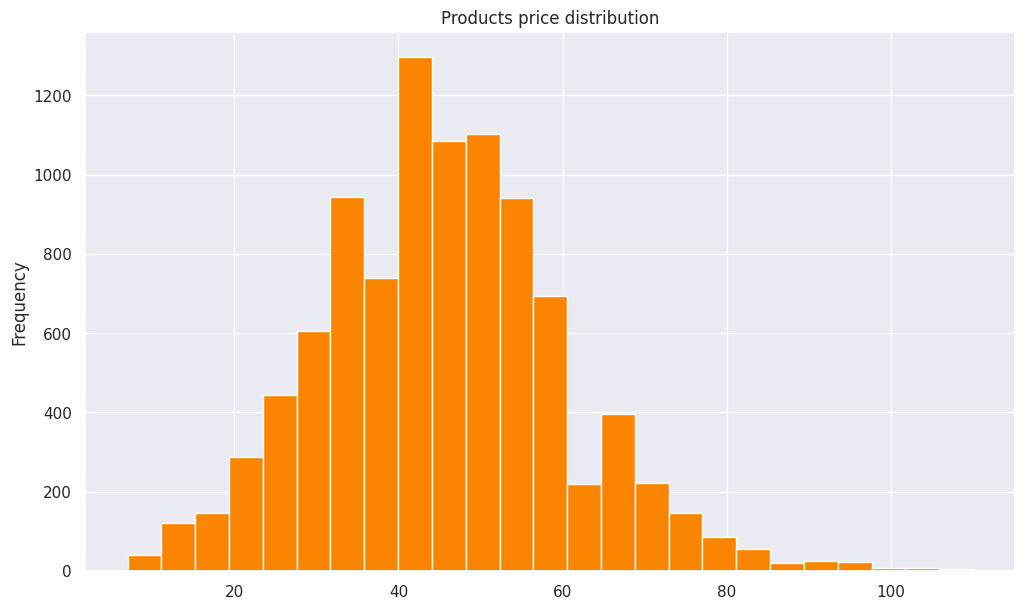

In [53]:
data_forgrap['Price per Unit'].plot(kind='hist',bins=25,figsize=(12,7),title='Products price distribution',color="#FB8500")

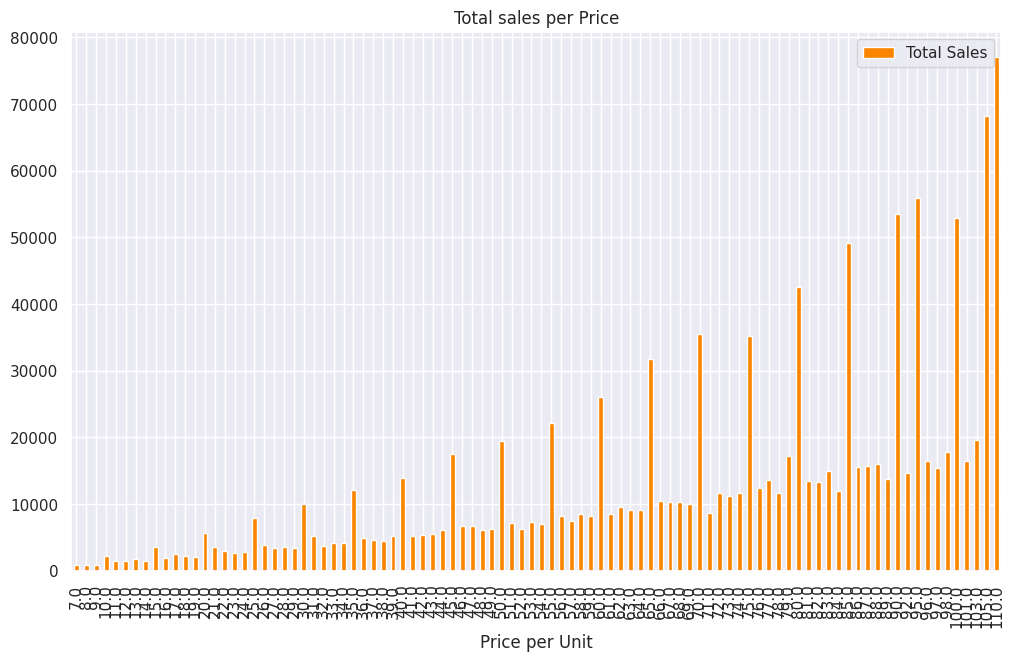

In [64]:
top_products= data_forgrap[['Price per Unit','Total Sales']].groupby('Price per Unit').mean()
top_products.plot(kind='bar', figsize=(12,7),title='Total sales per Price', color="#FB8500")
plt.show()

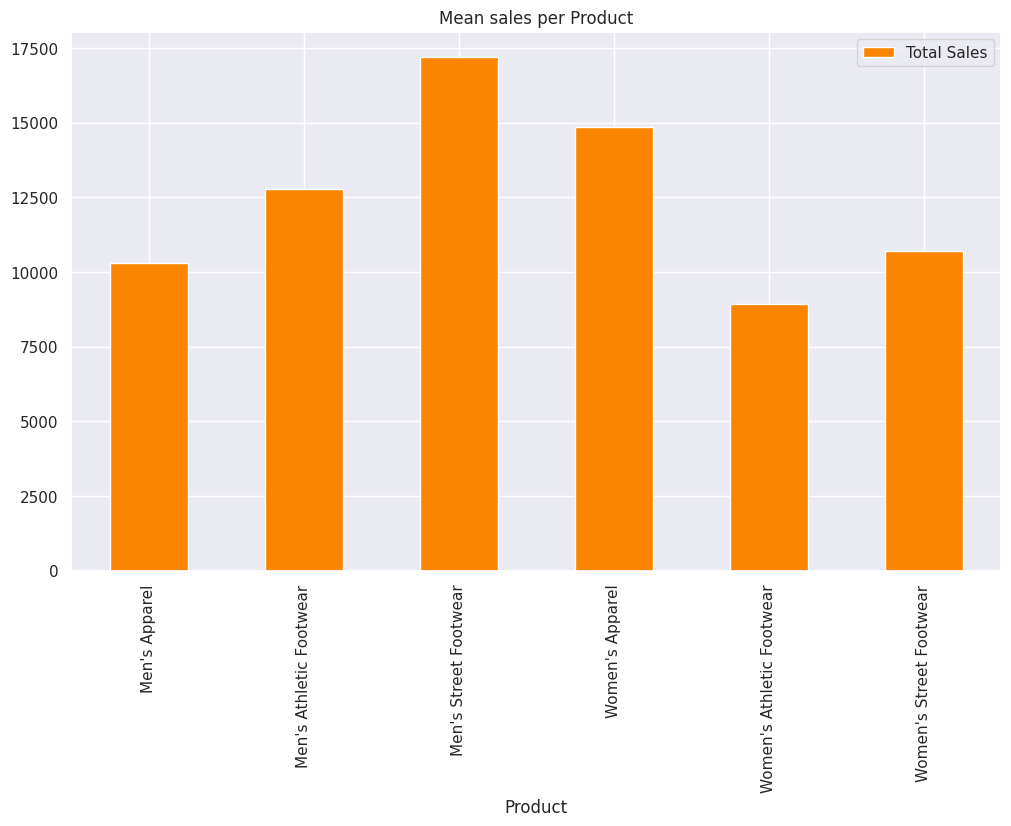

In [57]:

top_products= data_forgrap[['Product','Total Sales']].groupby('Product').mean()
top_products.plot(kind='bar',figsize=(12,7),title='Mean sales per Product', color="#FB8500")
plt.show()

<AxesSubplot: title={'center': 'Top Selling Methods'}, ylabel='Sales Method'>

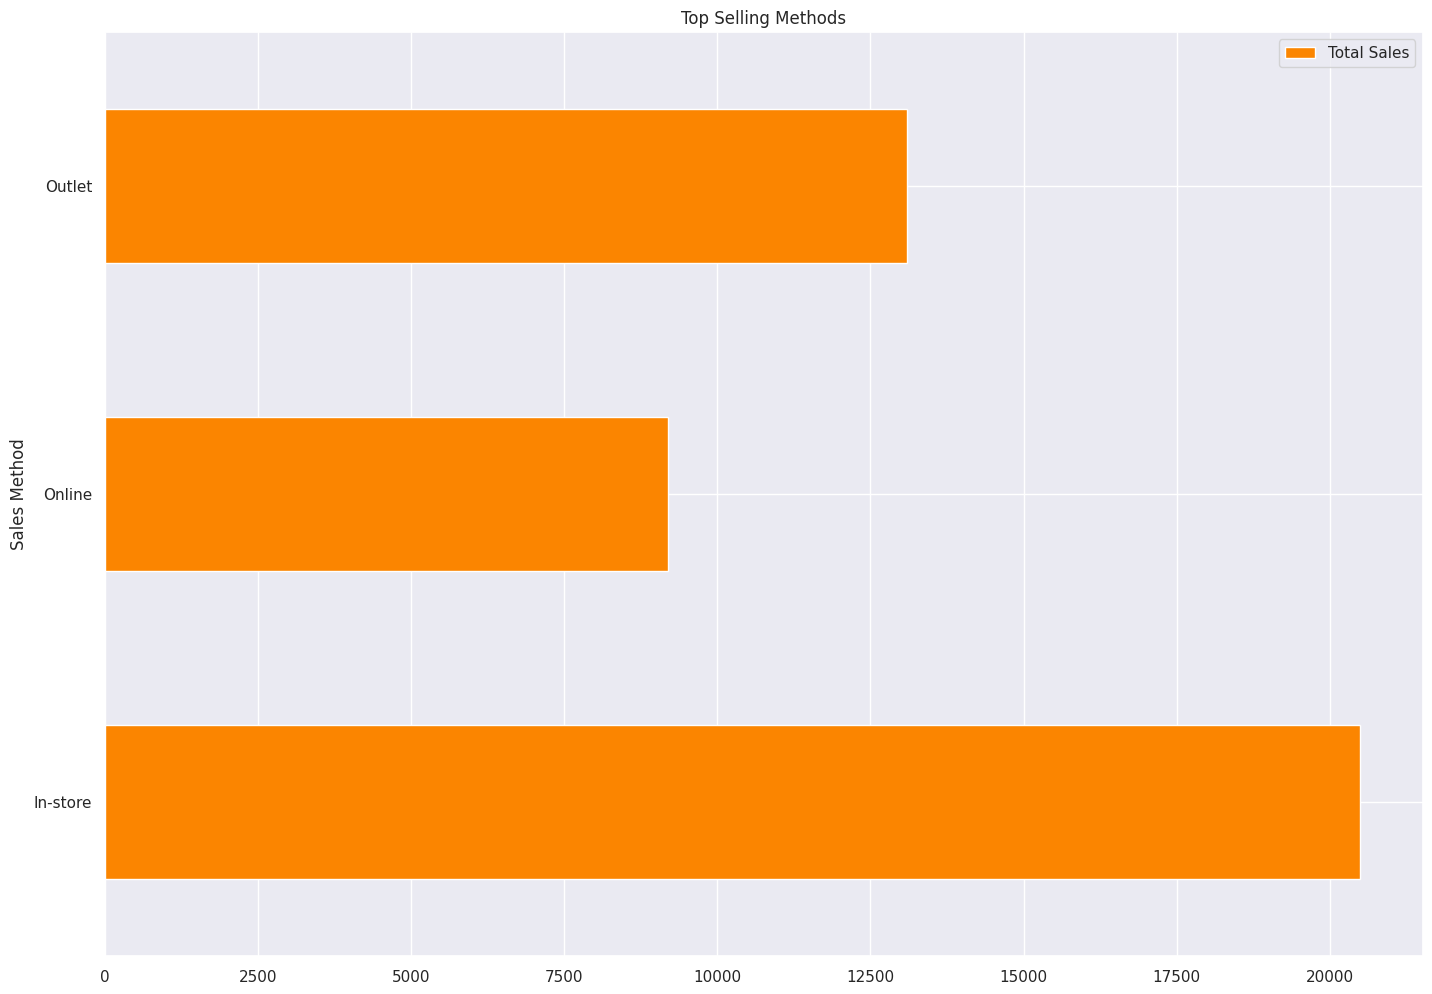

In [58]:
top_salesmt= data_forgrap[['Sales Method','Total Sales']].groupby('Sales Method').mean()
top_salesmt.plot(kind='barh',title='Top Selling Methods', color="#FB8500")

array([<AxesSubplot: ylabel='Total Sales'>], dtype=object)

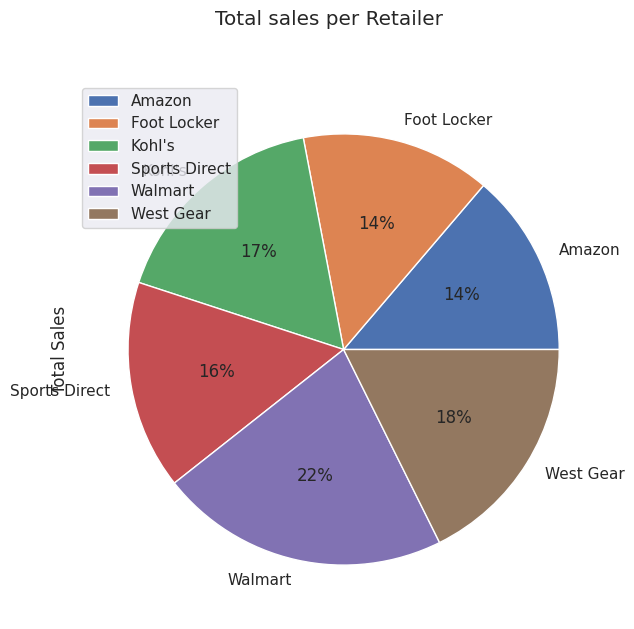

In [60]:
top_retailers= data_forgrap[['Retailer','Total Sales']].groupby('Retailer').mean()
top_retailers.plot(kind='pie',subplots=True,figsize=(12,7),title='Total sales per Retailer',autopct='%1.0f%%')

<AxesSubplot: >

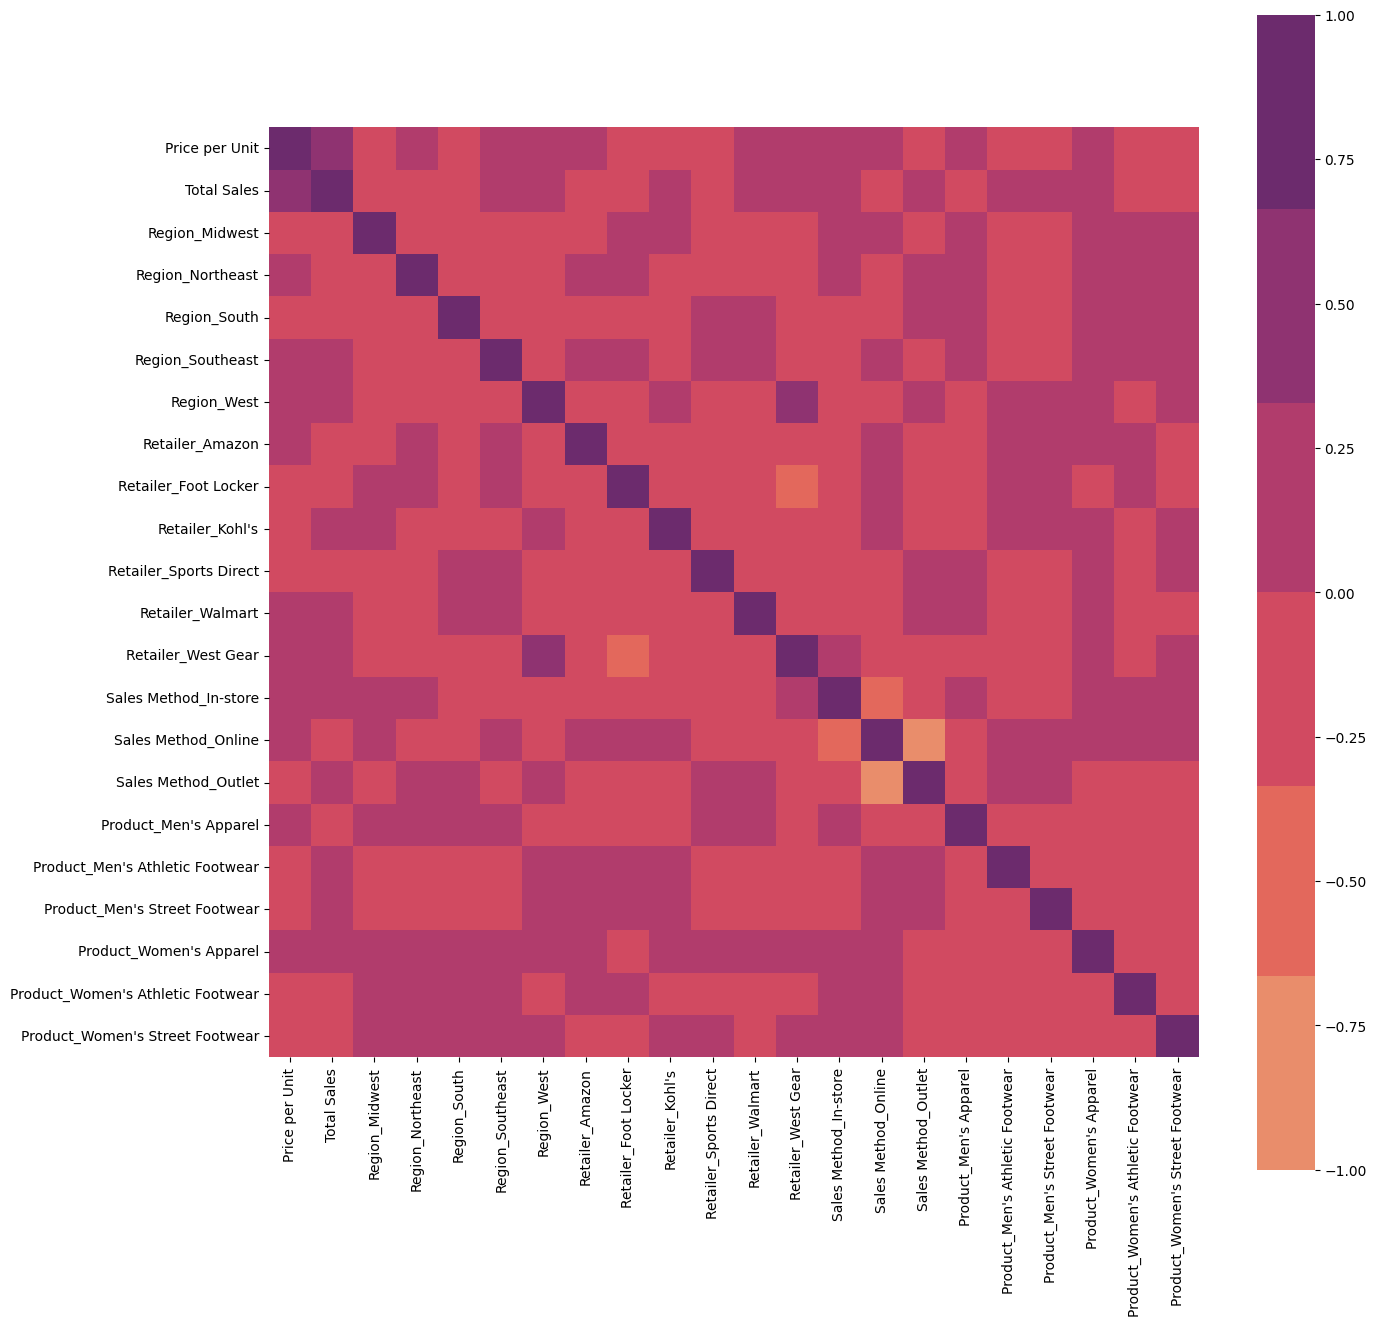

In [16]:
plt.figure(figsize=(15,15))
corr = df2.corr()
sns.heatmap(corr, cmap=sns.color_palette("flare"), vmin=-1, center=0, square=True)

In [18]:
import plotly.express as px
fig = px.histogram(df2, x="Price per Unit", title="Distribution of PPU")
fig.show()

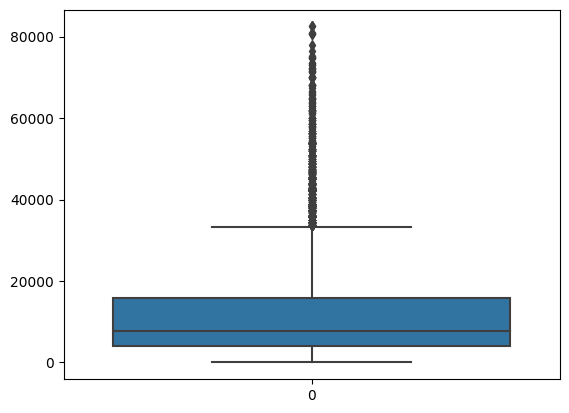

In [19]:
sns.boxplot(df2["Total Sales"])
sns.set(rc={'figure.figsize':(17, 12)})

# Линейная Регрессия на ненормализированных данных

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [21]:
df2

,Price per Unit,Total Sales,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,...,Retailer_West Gear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,47.0,7426.0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,0
1,42.0,5208.0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,57.0,10944.0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,47.0,7050.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,68.0,8704.0,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,54.0,5076.0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9644,36.0,1908.0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
9645,20.0,2880.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9646,33.0,2640.0,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0


In [22]:
Xlin = df2.values[:,(0,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)]
Ylin = df2.values[:, 1]


Xlin_train, Xlin_test, ylin_train, ylin_test = train_test_split(Xlin, Ylin, test_size=0.1, random_state=0)

In [23]:
lr = LinearRegression()
lr.fit(Xlin_train,ylin_train)
ylin_pred = lr.predict(Xlin_test)


In [30]:

# Рассчет MSE
mse = np.mean((ylin_test - ylin_pred)**2)

# Рассчет MAPE
mape = np.mean(np.abs((ylin_test - ylin_pred) / ylin_test)) * 100

print("MSE:", mse)
print("MAPE:", mape)


MSE: 78275533.6997773
MAPE: inf
/tmp/ipykernel_3132/1346555267.py:5: RuntimeWarning:

divide by zero encountered in divide



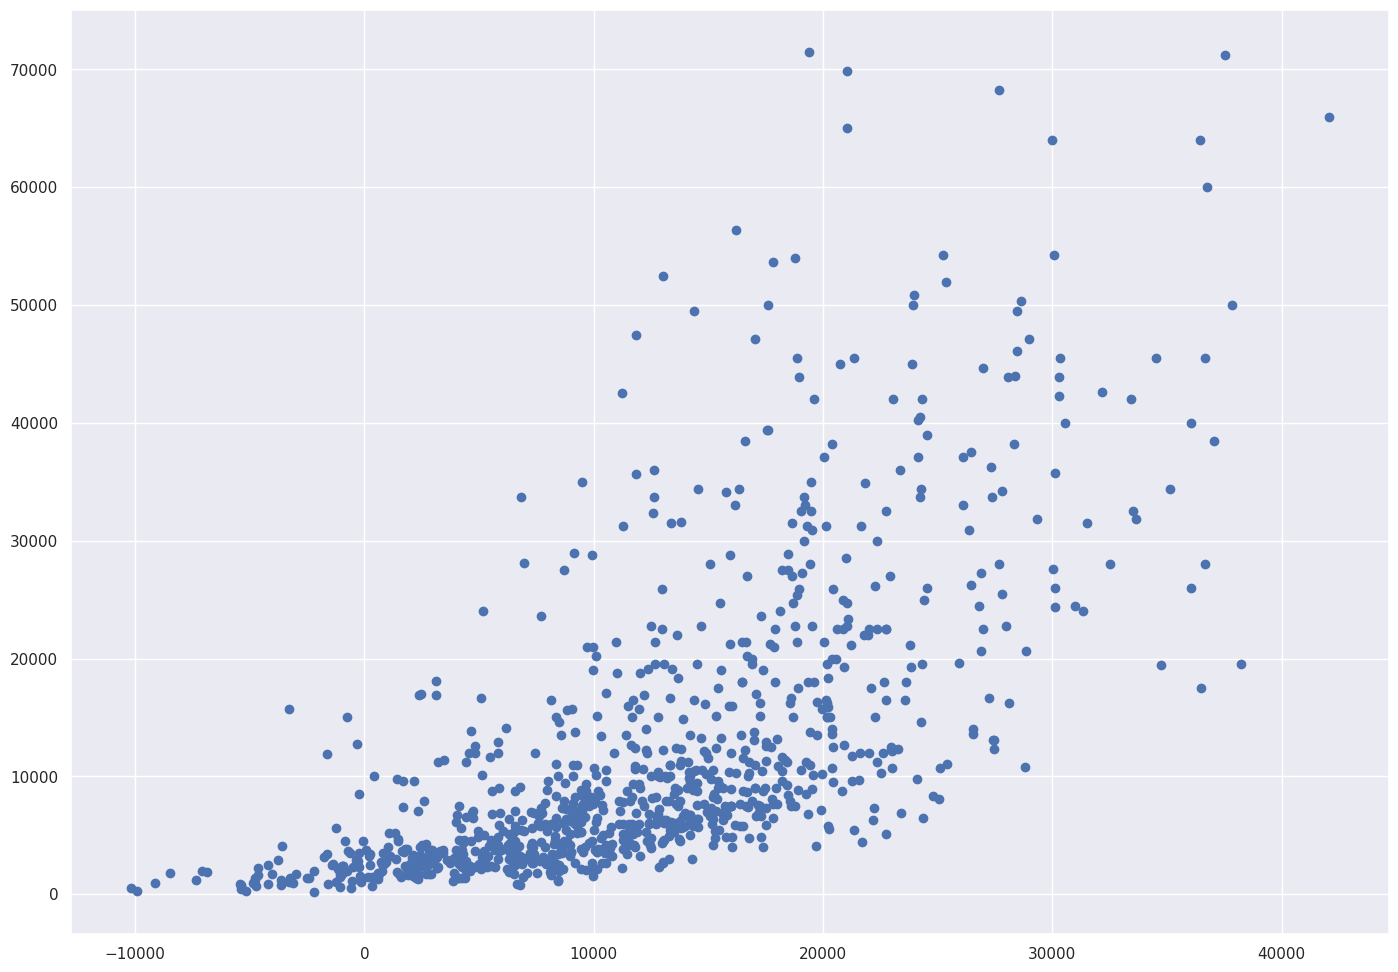

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

x, y = np.random.random((2, 100))*2
fig, ax = plt.subplots()
ax.scatter(ylin_pred, ylin_test)

plt.show()

# Cat BOOST на ненормализированных данных

In [ ]:
Xcat = df2.values[:,(0,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)]
Ycat = df2.values[:, 1]


Xcat_train, Xcat_test, ycat_train, ycat_test = train_test_split(Xcat, Ycat, test_size=0.1, random_state=0)

In [ ]:
from catboost import Pool, CatBoostRegressor

# initialize Pool
train_pool = Pool(Xcat_train, ycat_train)
test_pool = Pool(Xcat_test, ycat_test) 

# specify the training parameters 
model = CatBoostRegressor(iterations=2500, loss_function='MAE', verbose=100)
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
predscat = model.predict(test_pool)


0:	learn: 8219.0876059	total: 47.1ms	remaining: 1m 57s
100:	learn: 4965.3567820	total: 158ms	remaining: 3.76s
200:	learn: 4544.5184521	total: 270ms	remaining: 3.09s
300:	learn: 4323.5777436	total: 387ms	remaining: 2.83s
400:	learn: 4088.6750802	total: 505ms	remaining: 2.64s
500:	learn: 3893.8987330	total: 620ms	remaining: 2.48s
600:	learn: 3752.3652981	total: 739ms	remaining: 2.33s
700:	learn: 3642.5239778	total: 852ms	remaining: 2.19s
800:	learn: 3553.7163134	total: 964ms	remaining: 2.04s
900:	learn: 3479.4642373	total: 1.07s	remaining: 1.91s
1000:	learn: 3410.8964155	total: 1.19s	remaining: 1.78s
1100:	learn: 3352.0371655	total: 1.3s	remaining: 1.66s
1200:	learn: 3305.7994668	total: 1.42s	remaining: 1.53s
1300:	learn: 3276.0012383	total: 1.53s	remaining: 1.41s
1400:	learn: 3247.0491342	total: 1.64s	remaining: 1.29s
1500:	learn: 3212.2610842	total: 1.75s	remaining: 1.17s
1600:	learn: 3182.8512410	total: 1.86s	remaining: 1.05s
1700:	learn: 3152.8092305	total: 1.98s	remaining: 928ms
180

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(ycat_test, predscat, squared=False)
mae = mean_absolute_error(ycat_test, predscat)
# Рассчет MAPE
mape = np.mean(np.abs((ycat_test - predscat) / ycat_test)) * 100

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)

MAE: 3652.055787636688
MAPE: 36.444058336886826
RMSE: 6869.897945818002


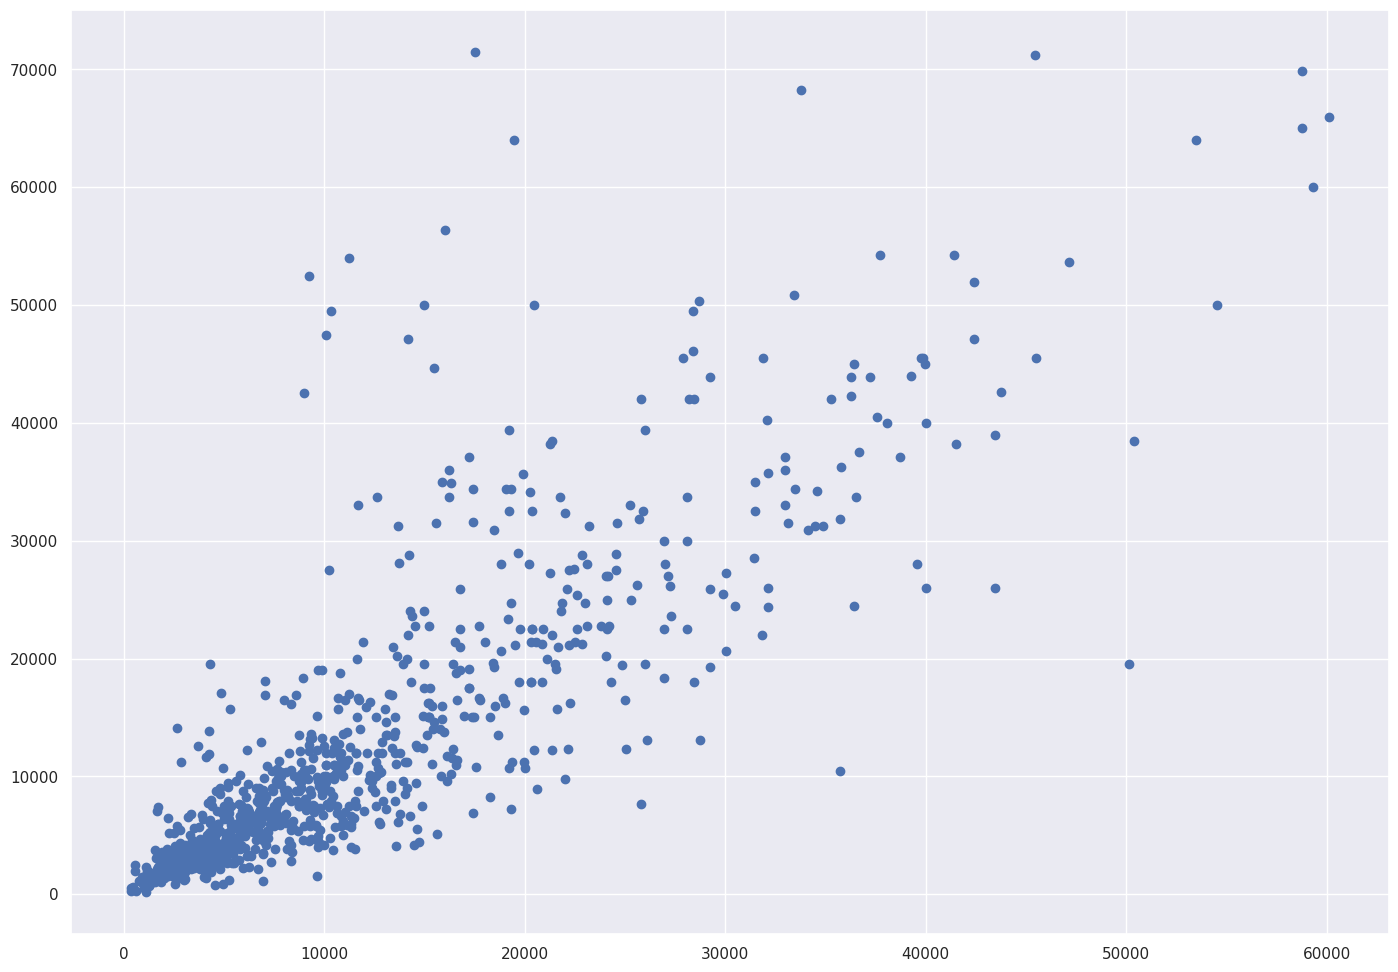

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
ax.scatter(predscat,ycat_test)
plt.show()

# XG BOOST для НЕнормализированных данных 

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import plotly.express as px

In [ ]:
Xgb = df2.values[:,(0,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)]
Ygb = df2.values[:, 1]


Xgb_train, Xgb_test, ygb_train, ygb_test = train_test_split(Xgb, Ygb, test_size=0.1, random_state=0)

In [ ]:
bst = XGBRegressor(n_estimators=100, max_depth=16, objective='reg:squarederror',eval_metric="rmse")

# fit model
bst.fit(Xgb_train, ygb_train)

predsgb = bst.predict(Xgb_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(ygb_test, predsgb, squared=False)
mae = mean_absolute_error(ygb_test, predsgb)
# Рассчет MAPE
mape = np.mean(np.abs((ygb_test - predsgb) / ygb_test)) * 100

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)

MAE: 3609.3183964072114
MAPE: 43.492917232086256
RMSE: 6655.200744729462


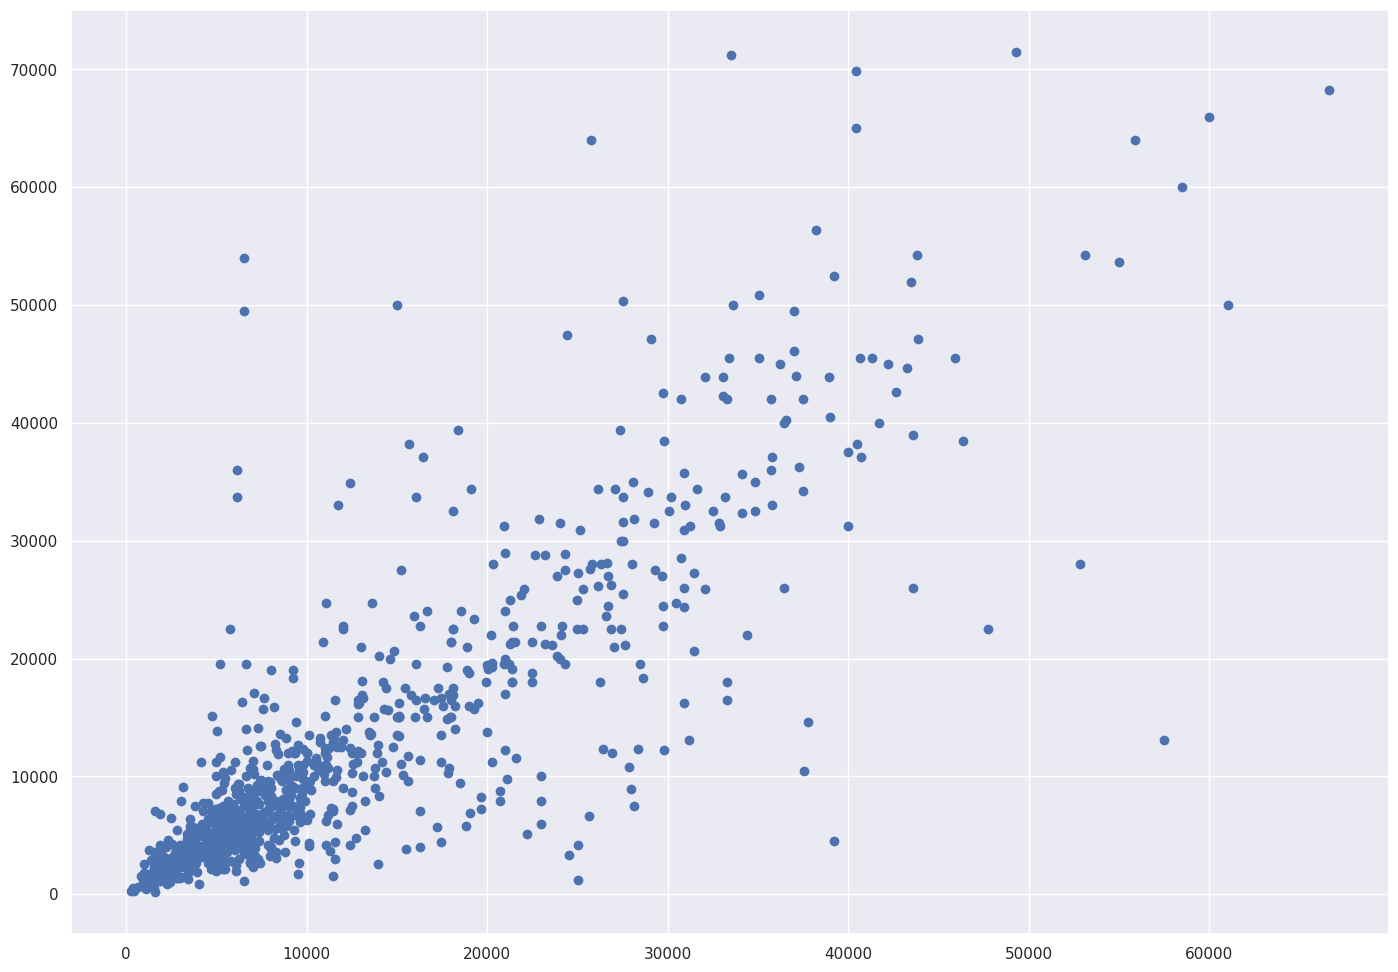

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
ax.scatter(predsgb, ygb_test)
plt.show()


# Данные с нормализацией 

Данные с нормализацией 

In [ ]:
dfn = df2.copy()
dfn["Total Sales"] = 1000 * ((dfn["Total Sales"] - dfn["Total Sales"].min()) / (dfn["Total Sales"].max() - dfn["Total Sales"].min()))
dfn

,Price per Unit,Total Sales,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,...,Retailer_West Gear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,60.0,327.272727,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,50.0,151.515152,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,67.0,84.460606,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,45.0,177.272727,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,45.0,245.454545,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,55.0,100.000000,0,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
9644,59.0,133.018182,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9645,86.0,175.127273,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
9646,29.0,24.606061,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
Xn= dfn.values[:,(0,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)]
Yn= dfn.values[:, 1]


Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, Yn, test_size=0.15, random_state=1)

# CATBOOST для нормализированных данных

In [ ]:
from catboost import Pool, CatBoostRegressor

# initialize Pool
train_pool = Pool(Xn_train, yn_train)
test_pool = Pool(Xn_test, yn_test) 

# specify the training parameters 
model = CatBoostRegressor(iterations=2500, loss_function='MAE', verbose=100)
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
predsn = model.predict(test_pool)

0:	learn: 99.7905353	total: 1.41ms	remaining: 3.52s
100:	learn: 60.4979513	total: 111ms	remaining: 2.63s
200:	learn: 55.3003578	total: 223ms	remaining: 2.54s
300:	learn: 52.3857349	total: 335ms	remaining: 2.45s
400:	learn: 49.4376063	total: 444ms	remaining: 2.32s
500:	learn: 47.2086232	total: 555ms	remaining: 2.21s
600:	learn: 45.3982586	total: 663ms	remaining: 2.09s
700:	learn: 44.1051877	total: 776ms	remaining: 1.99s
800:	learn: 43.1131014	total: 884ms	remaining: 1.87s
900:	learn: 42.1769359	total: 992ms	remaining: 1.76s
1000:	learn: 41.4046191	total: 1.1s	remaining: 1.65s
1100:	learn: 40.7602859	total: 1.21s	remaining: 1.54s
1200:	learn: 40.2341223	total: 1.32s	remaining: 1.43s
1300:	learn: 39.8589909	total: 1.43s	remaining: 1.32s
1400:	learn: 39.3513454	total: 1.55s	remaining: 1.21s
1500:	learn: 38.9910070	total: 1.65s	remaining: 1.1s
1600:	learn: 38.6612860	total: 1.76s	remaining: 987ms
1700:	learn: 38.3476444	total: 1.86s	remaining: 874ms
1800:	learn: 38.0514810	total: 1.97s	rema

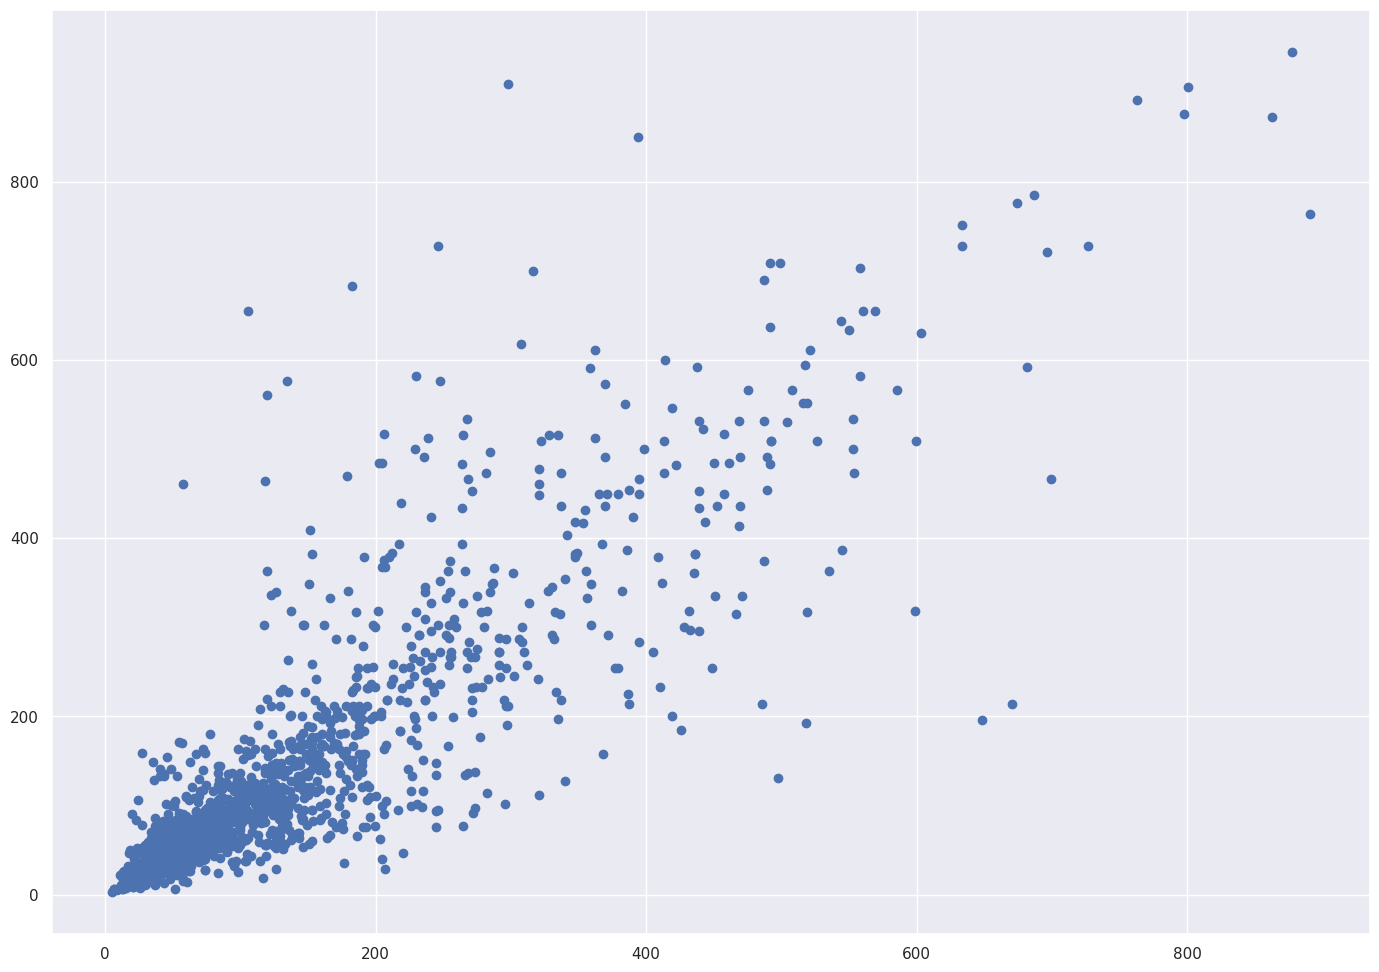

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

x, y = np.random.random((2, 100))*2
fig, ax = plt.subplots()
ax.scatter(predsn, yn_test)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(yn_test, predsn, squared=False)
mae = mean_absolute_error(yn_test, predsn)
# Рассчет MAPE
mape = np.mean((np.abs(yn_test - predsn)) / (yn_test)) * 100

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)

MAE: 43.96197898270331
MAPE: 37.86694793972443
RMSE: 78.84452633117372


# Линейная Регрессия Для нормализированных данных

In [ ]:
lr = LinearRegression()
lr.fit(Xn_train,yn_train)
y_pred = lr.predict(Xn_test)


In [ ]:
# Рассчет MSE
mse = np.mean((yn_test - y_pred)**2)

# Рассчет MAPE
mape = np.mean(np.abs((yn_test - y_pred)) / (yn_test)) * 100

print("MSE:", mse)
print("MAPE:", mape)

MSE: 12348.054598693438
MAPE: 92.72182736317414


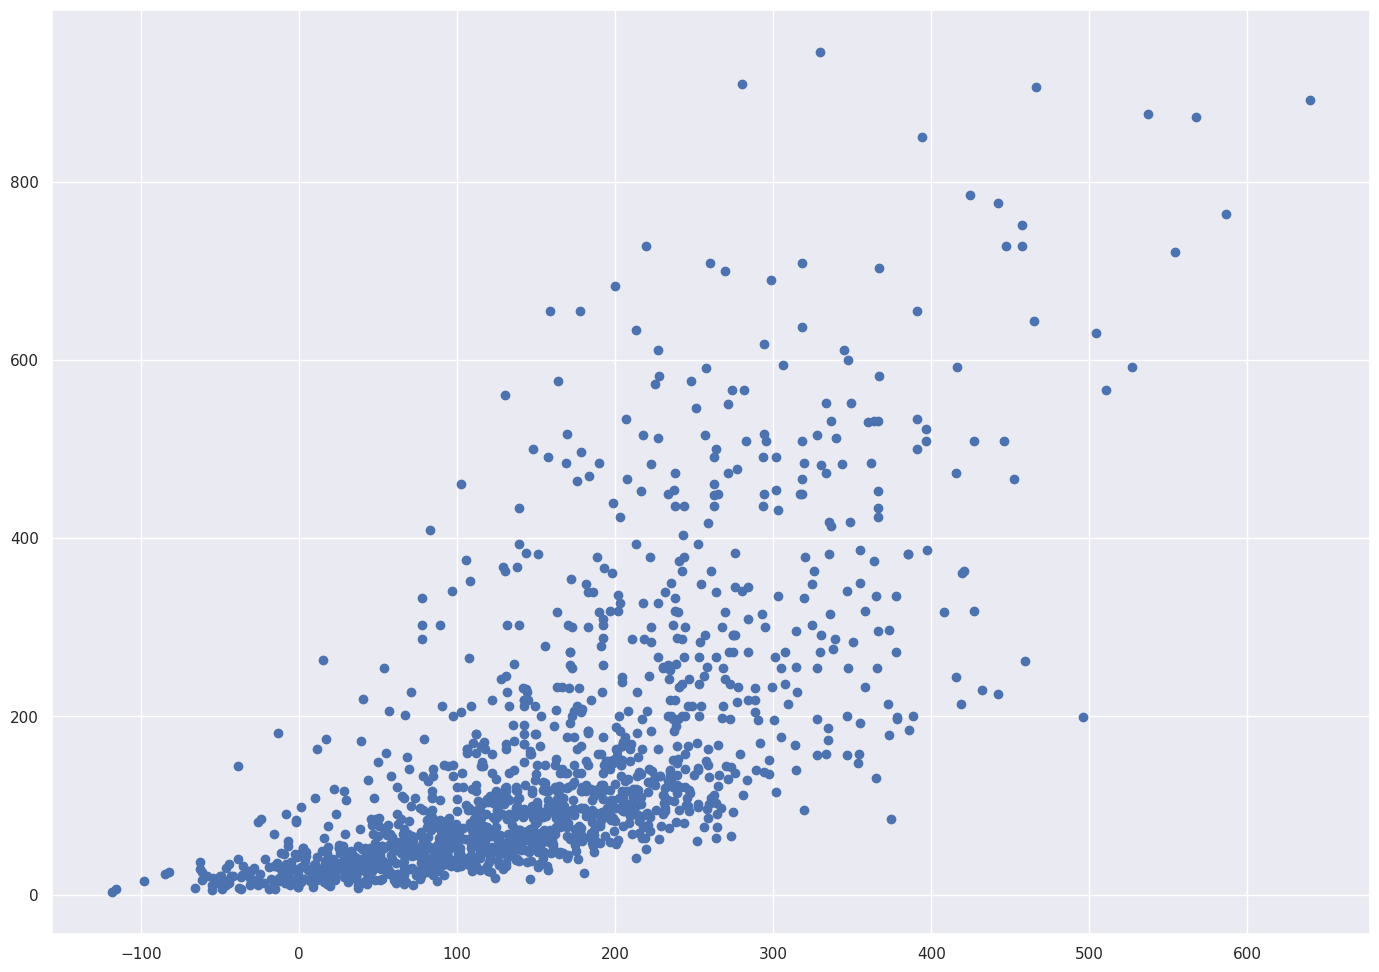

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

x, y = np.random.random((2, 100))*2
fig, ax = plt.subplots()
ax.scatter(y_pred, yn_test)

plt.show()

# XGBOOST для нормализированных данных

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import plotly.express as px

In [ ]:
bst = XGBRegressor(n_estimators=100, max_depth=16, objective='reg:squarederror',eval_metric="rmse")

# fit model
bst.fit(Xn_train, yn_train)

predsgb = bst.predict(Xn_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(yn_test, predsgb, squared=False)
mae = mean_absolute_error(yn_test, predsgb)
# Рассчет MAPE
mape = np.mean((np.abs((yn_test - predsgb) / yn_test))) * 100

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)

MAE: 43.27527702304959
MAPE: 42.95493009319936
RMSE: 78.79091736004422


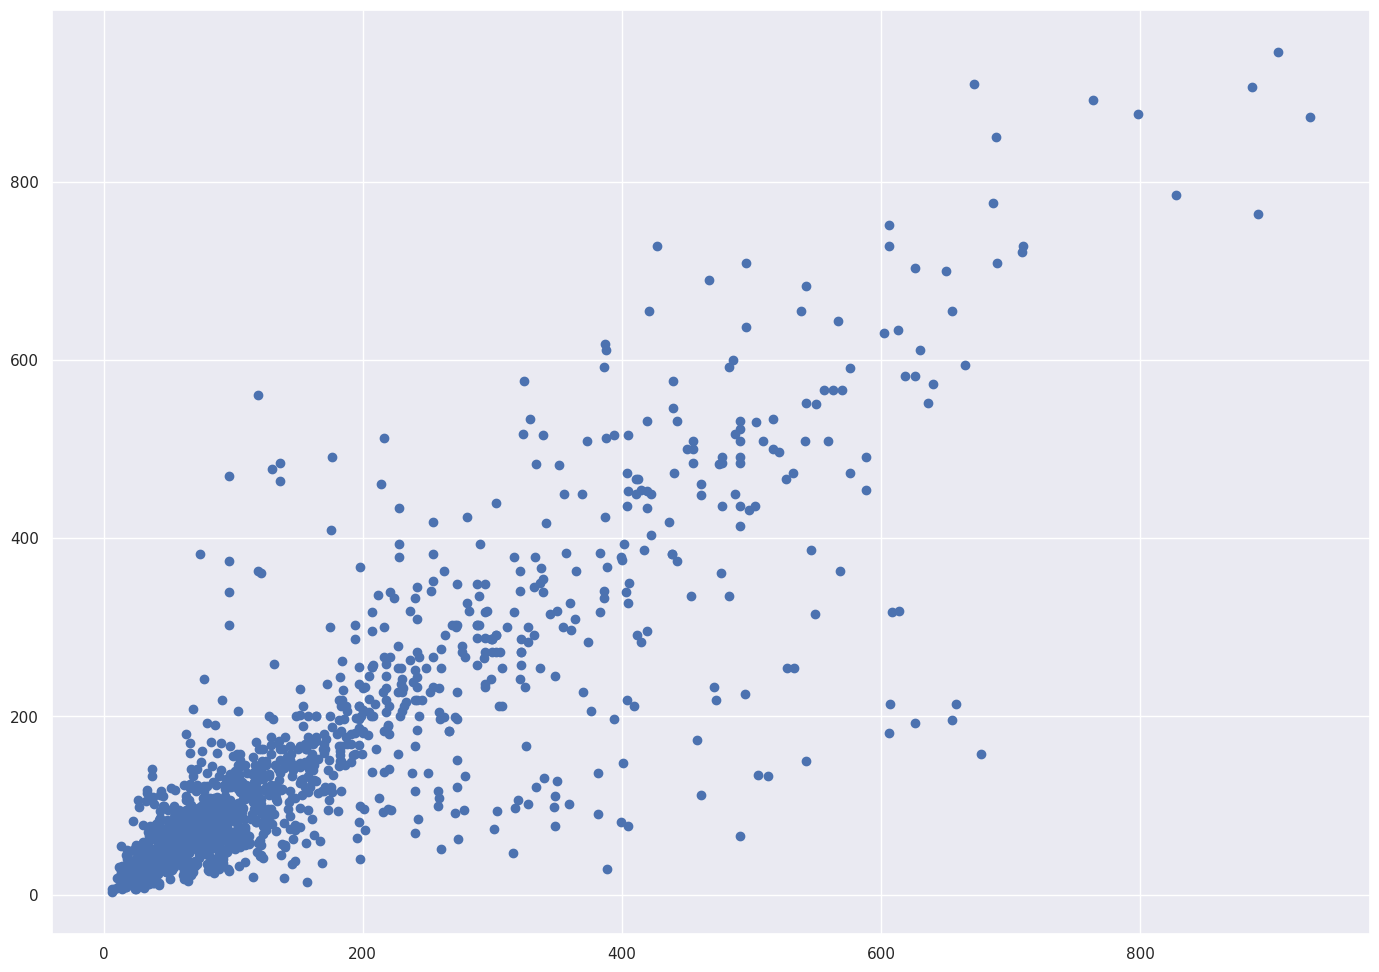

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

x, y = np.random.random((2, 100))*2
fig, ax = plt.subplots()
ax.scatter(predsgb, yn_test)

plt.show()

# Данные без "хвоста"

In [ ]:
halfdata = df2.copy()


In [ ]:
halfdata["Sales"] = halfdata["Total Sales"]
halfdata = halfdata.drop("Total Sales", axis=1)


In [ ]:
halfdata = halfdata[halfdata.Sales < 50000]
halfdata

,Price per Unit,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,Retailer_Sports Direct,...,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear,Sales
0,60.0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,27000.0
1,50.0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,12500.0
2,67.0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,6968.0
3,45.0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,14625.0
4,45.0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,20250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,55.0,0,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,8250.0
9644,59.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,10974.0
9645,86.0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,14448.0
9646,29.0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,2030.0


In [ ]:
import plotly.express as px
fig = px.histogram(halfdata, x="Sales", title="Distribution of sales")
fig.show()

# Линейная Регрессия для данных без хвоста

In [ ]:
Xl= halfdata.values[:,(0,1,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20)]
Yl= halfdata.values[:, 21]


Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, Yl, test_size=0.15, random_state=1)

In [ ]:
lr = LinearRegression()
lr.fit(Xl_train,yl_train)
yl_pred = lr.predict(Xl_test)
r2=r2_score(yl_test, yl_pred)
print(r2)

# Рассчет MSE
mse = np.mean((yl_test - yl_pred)**2)

# Рассчет MAPE
mape = np.mean(np.abs((yl_test - yl_pred)) / (yl_test)) * 100

print("MSE:", mse)
print("MAPE:", mape)

0.495030318652941
MSE: 58001487.40217451
MAPE: 86.72565514608218


# CATBOOST для данных без хвоста

In [ ]:
Xc= halfdata.values[:,(0,1,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20)]
Yc= halfdata.values[:, 21]


Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, Yc, test_size=0.15, random_state=1)

In [ ]:
from catboost import Pool, CatBoostRegressor

# initialize Pool
train_pool = Pool(Xc_train, yc_train)
test_pool = Pool(Xc_test, yc_test) 

# specify the training parameters 
model = CatBoostRegressor(iterations=2500, loss_function='MAE', verbose=100)
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
predc = model.predict(test_pool)

0:	learn: 7196.0527808	total: 1.57ms	remaining: 3.93s
100:	learn: 4444.8207761	total: 112ms	remaining: 2.67s
200:	learn: 4099.6202151	total: 216ms	remaining: 2.47s
300:	learn: 3873.7125977	total: 332ms	remaining: 2.43s
400:	learn: 3675.8088636	total: 437ms	remaining: 2.29s
500:	learn: 3510.4847266	total: 554ms	remaining: 2.21s
600:	learn: 3380.2031603	total: 660ms	remaining: 2.09s
700:	learn: 3293.0143153	total: 764ms	remaining: 1.96s
800:	learn: 3222.4640370	total: 867ms	remaining: 1.84s
900:	learn: 3162.5544776	total: 972ms	remaining: 1.72s
1000:	learn: 3115.4464652	total: 1.07s	remaining: 1.61s
1100:	learn: 3062.1165795	total: 1.2s	remaining: 1.52s
1200:	learn: 3021.9367717	total: 1.3s	remaining: 1.41s
1300:	learn: 2990.4110912	total: 1.41s	remaining: 1.3s
1400:	learn: 2961.2056268	total: 1.51s	remaining: 1.19s
1500:	learn: 2938.2873031	total: 1.62s	remaining: 1.08s
1600:	learn: 2909.8777503	total: 1.73s	remaining: 970ms
1700:	learn: 2886.7879631	total: 1.83s	remaining: 862ms
1800:	

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(yc_test, predc, squared=False)
mae = mean_absolute_error(yc_test, predc)
# Рассчет MAPE
mape = np.mean((np.abs(yc_test - predc)) / (yc_test)) * 100

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)

MAE: 3176.095494538313
MAPE: 36.545731373618246
RMSE: 5384.760004655536


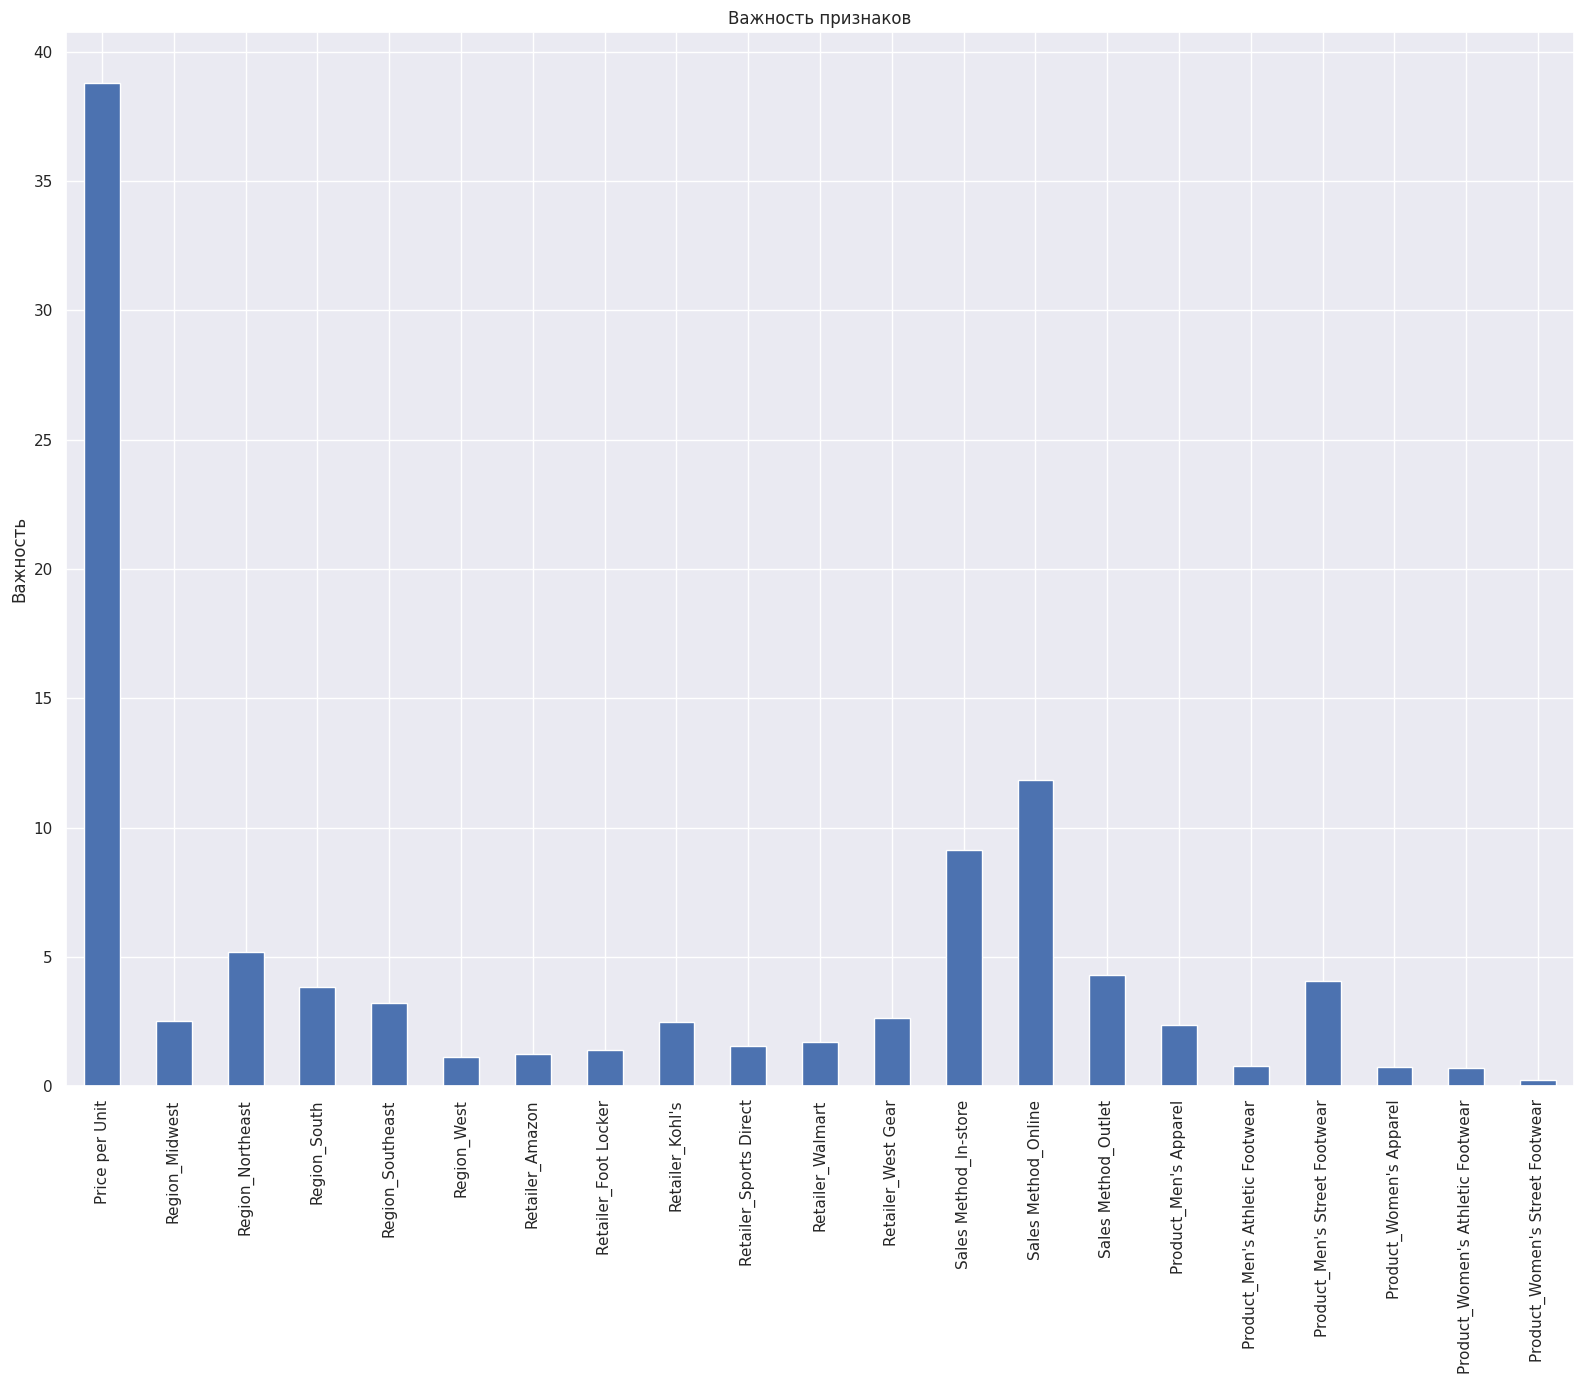

In [ ]:
sk = pd.Series(model.feature_importances_,(df2.drop("Total Sales", axis=1)).columns)

fig, ax = plt.subplots(figsize=(16,14))
sk.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

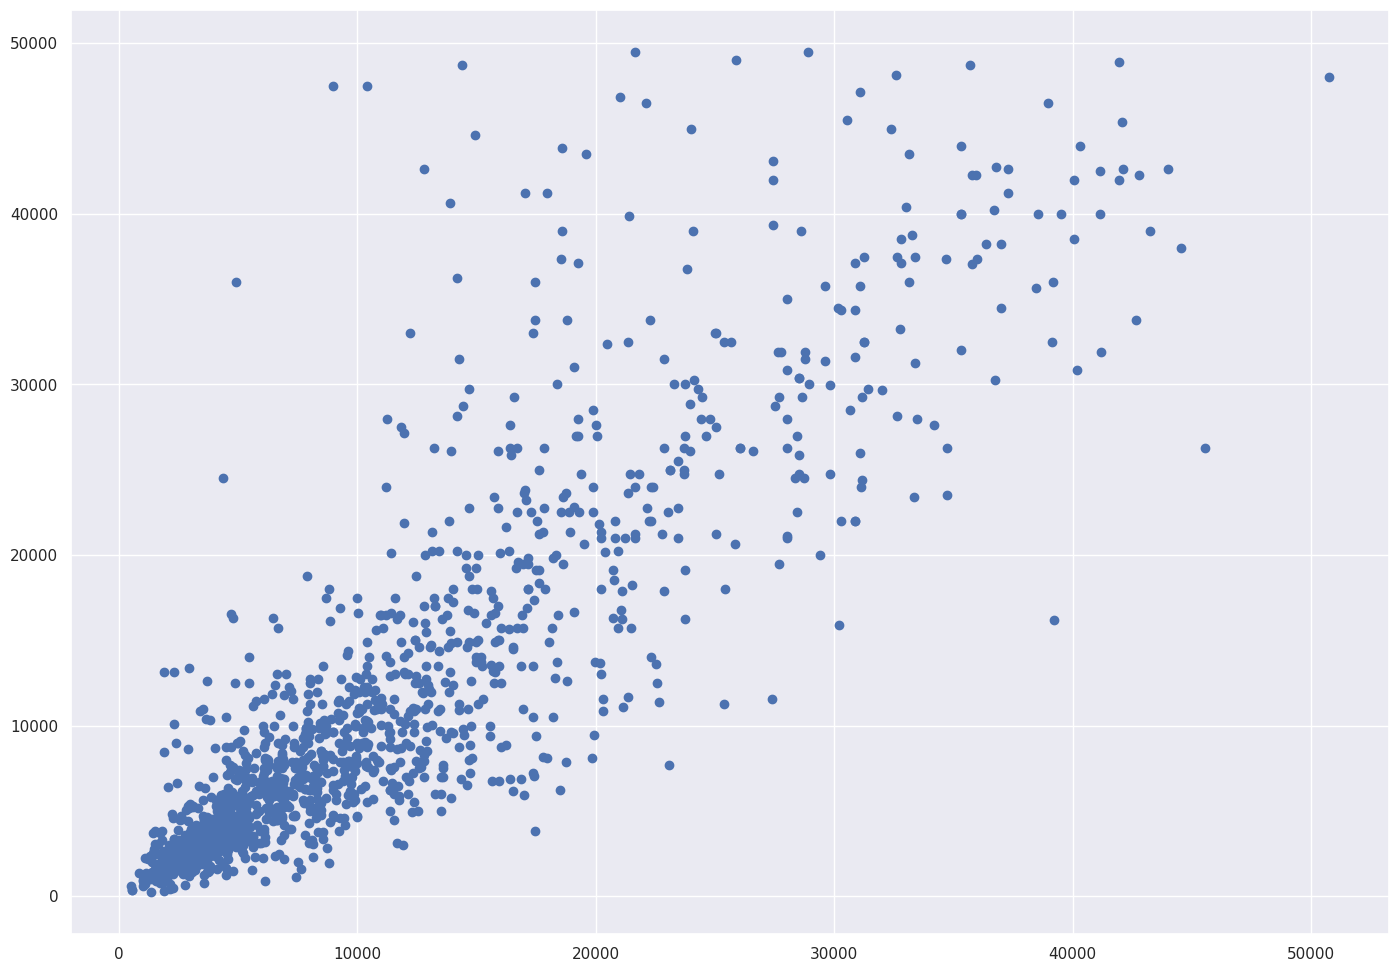

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

x, y = np.random.random((2, 100))*2
fig, ax = plt.subplots()
ax.scatter(predc,yc_test)

plt.show()

# XGBOOST для данных без хвоста 

In [ ]:
Xgb= halfdata.values[:,(0,1,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20)]
Ygb= halfdata.values[:, 21]


Xgb_train, Xgb_test, ygb_train, ygb_test = train_test_split(Xgb, Ygb, test_size=0.15, random_state=1)

In [ ]:
bst = XGBRegressor(n_estimators=100, max_depth=16, objective='reg:squarederror',eval_metric="rmse")

# fit model
bst.fit(Xgb_train, ygb_train)

predgb = bst.predict(Xgb_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(ygb_test, predgb, squared=False)
mae = mean_absolute_error(ygb_test, predgb)
# Рассчет MAPE
mape = np.mean((np.abs(ygb_test - predgb)) / (ygb_test)) * 100

print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)

MAE: 3269.4210163453445
MAPE: 44.4501268219956
RMSE: 5592.934933439815


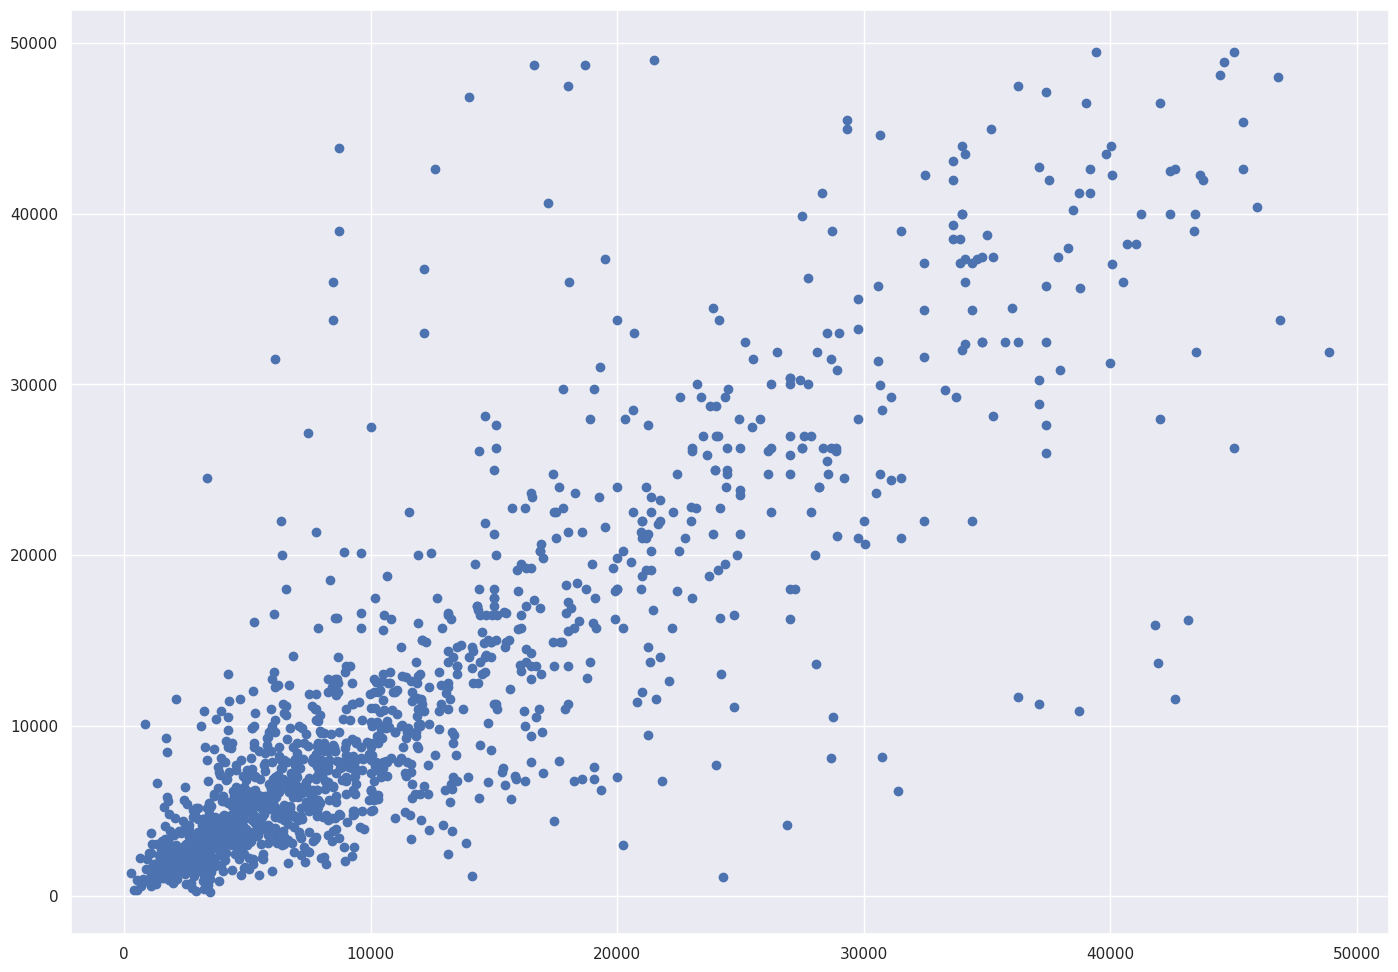

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

x, y = np.random.random((2, 100))*2
fig, ax = plt.subplots()
ax.scatter(predgb,ygb_test)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bbb0613e-2f22-4925-8a20-4af8834a2a03' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>